# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Homework 1 - Smoothers and Generalized Additive Models



**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors**: Mark Glickman, Pavlos Protopapas, & Chris Tanner


<hr style="height:2pt">

### Homework 1 is due February 6th

In [1]:
#PLEASE RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment, please follow the instructions on Canvas.
- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

### Please use the libraries below:

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from pygam import LinearGAM, s, f
from sklearn.preprocessing import LabelEncoder

# Seaborn visualization library
import seaborn as sns


<hr style="height:2pt">

### Problem 1 - Modeling Seasonality of Airbnb Prices
In this problem, the task is to build a regression model to predict the price of an Airbnb rental for a given date. The data are provided in `calendar_train.csv` and `calendar_test.csv`, which contain availability and price data for a sample of Airbnb units in the Boston area from 2017 to 2018, about 4 observations per day in each set.

Start by loading the data using pandas.  
*Hint*: You likely want to have pandas parse the `date` column as a datetime object via the `parse_dates` argument of `pd.read_csv`

In [3]:
#your code here
caltrain = pd.read_csv('../Data/calendar_train.csv', sep = ',',parse_dates = ['date'] )
caltest = pd.read_csv('../Data/calendar_test.csv', sep = ',',parse_dates = ['date'] )

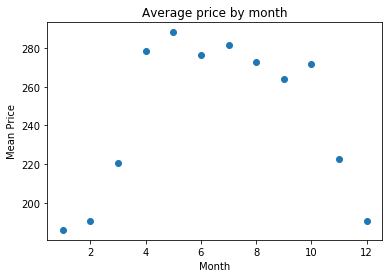

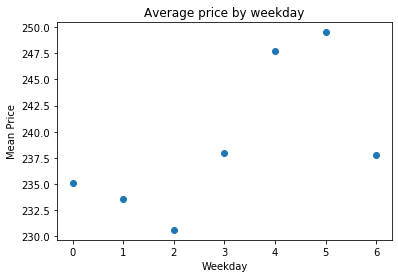

In [4]:
#your code here
#for training data 
import calendar
caltrain['Month'] = caltrain['date'].dt.month
caltrain['Weekday'] = caltrain['date'].dt.weekday


caltest['Month'] = caltest['date'].dt.month
caltest['Weekday'] = caltest['date'].dt.weekday

#dropna

caltrain1 = caltrain.dropna()
caltest1 = caltest.dropna()

Monthmean = caltrain1.groupby('Month')['price'].mean()
Monthmeandf = pd.DataFrame({'Month':Monthmean.index, 'MeanPrice':Monthmean.values})
Weekmean = caltrain1.groupby('Weekday')['price'].mean()
Weekmeandf = pd.DataFrame({'Weekday':Weekmean.index, 'MeanPrice':Weekmean.values})

plt.figure(1)
plt.scatter(Monthmeandf.Month,Monthmeandf.MeanPrice)
plt.title("Average price by month")
plt.xlabel("Month")
plt.ylabel("Mean Price")
plt.show()
plt.figure(2)
plt.scatter(Weekmeandf.Weekday,Weekmeandf.MeanPrice)
plt.title("Average price by weekday")
plt.xlabel("Weekday")
plt.ylabel("Mean Price")
plt.show()

<font color='blue'>
The first graph for month shows the the average price of a unit increases during the summer months and are lower in winter.<br />
This makes sense because more people travel during summer than in winter
The second graph shows that the prices rises at the end of the week and is lowest middle of the week. This also makes people tend to travel for lesiure more weekends and around it and less middle of the week.
</font>

### Explore different regression models

Fit a regression model that uses the date as a predictor and predicts the price of an Airbnb rental on that date. In this section, you should ignore all other predictors besides the date. Fit the following models on the training set, and compare the $R^2$ of the fitted models on the test set. Include plots of the fitted models for each method.

*Hint*: You may want to convert the `date` column into a numerical variable by taking the difference in days between each date and the earliest date in the column.

1. Fit simple polynomial models of degree 2, 3, 5, and 8 to the training data. Provide train and test R^2 scores and provide plot(s) of a) the daily averages and b) each model's predictions.

2. You should see that the degree 8 polynomial's predictions are awful- either nonsensically near zero [or far too large] at many input values. This isn't just simple overfitting. What is going wrong in this model, and how might it be addressed?

3. Fit a Smoothing spline model in `pygam` with the smoothness parameter chosen by cross-validation on the training set. Provide the train and test scores of the best-performing model, and plot its predictions. Also plot the predictions of models with more and less smoothing. When plotting the smooths, show a scatterplot of the daily averages on the same axes, for context.

4. Of the models, which performs the best? What is the effect of the tuning parameters (degree and smoothness penalty)?

In [5]:
#Add column to store the day from minimum
caltrain1.loc[:,("Day")] = (caltrain1['date'] - caltrain1['date'].min()).dt.days
caltest1.loc[:,("Day")] = (caltest1['date'] - caltest1['date'].min()).dt.days

DailyMeanTrain = caltrain1.groupby('Day')['price'].mean()
DailyMeanTraindf = pd.DataFrame({'Day':DailyMeanTrain.index, 'price':DailyMeanTrain.values})
DailyMeanTest = caltest1.groupby('Day')['price'].mean()
DailyMeanTestdf = pd.DataFrame({'Day':DailyMeanTest.index, 'price':DailyMeanTest.values})

/Applications/anaconda3/envs/cs109b/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Applications/anaconda3/envs/cs109b/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### 1. Polynomials

R2 for training data and 2 order polynomial is 0.19584841843111211


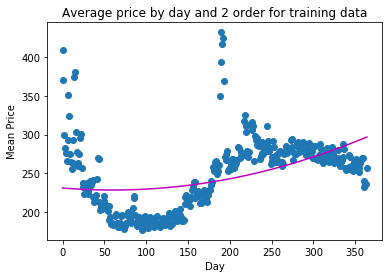

R2 for test data and 2 order polynomial is 0.20031669853604295


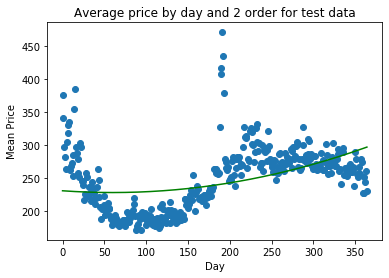

R2 for training data and 3 order polynomial is 0.6380031312876843


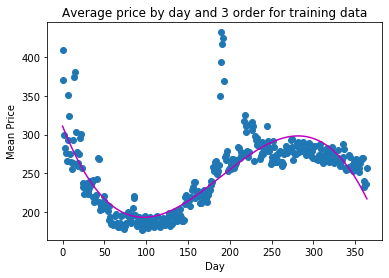

R2 for test data and 3 order polynomial is 0.6139438239137358


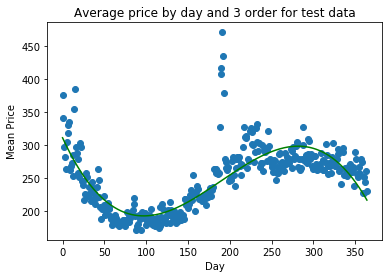

R2 for training data and 5 order polynomial is 0.7168952318703692


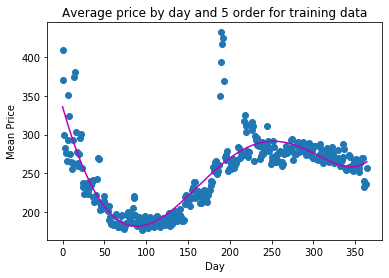

R2 for test data and 5 order polynomial is 0.6851212911945266


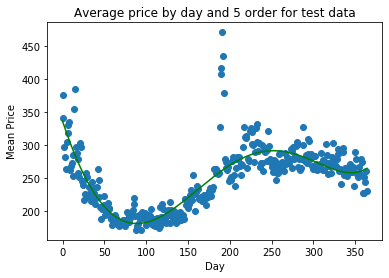

R2 for training data and 8 order polynomial is -4.8630891996017995


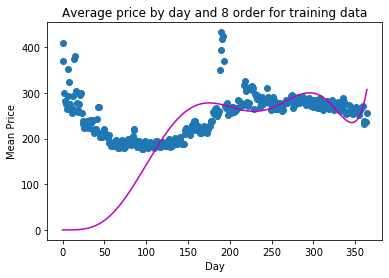

R2 for test data and 8 order polynomial is -4.515974645241047


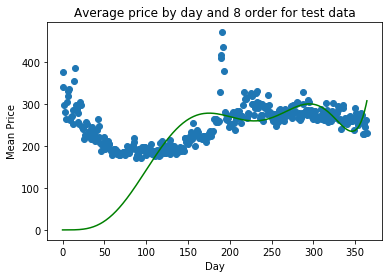

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     181.8
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           4.69e-96
Time:                        18:50:49   Log-Likelihood:                -1687.7
No. Observations:                 365   AIC:                             3387.
Df Residuals:                     359   BIC:                             3411.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.1004      3.811     44.109      0.000     160.606     175.595
X_poly[0]    168.1167      3.811     44.109      0.000     160.621     175.612
X_poly[1]     -3.8289      0.425     -9.005      0.000      -4.665      -2.993
X_poly[2]      0.0258      0.007      3.554      0.000       0.012       0.040
X_poly[3]  -6.007e-06   5.07e-05     -0.119      0.906      -0.000    9.36e-05
X_poly[4]  -2.705e-07   1.54e-07     -1.761      0.079   -5.72e-07    3.15e-08
X_poly[5]     4.6e-10   1.68e-10      2.740      0.006     1.3e-10     7.9e-10
==============================================================================
Omnibus:                      307.669   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6055.216
Skew:                           3.505   Prob(JB):                         0.00
Kurtosis:                      21.682   Cond. No.                     1.37e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+17. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
x = DailyMeanTraindf.Day
x = x[:, np.newaxis]
y = DailyMeanTraindf.price
y = y[:, np.newaxis]

def model_poly(ndeg):
  #Fit nth degree polynomial
  poly = PolynomialFeatures(degree = ndeg) 

  X_poly = poly.fit_transform(x) 
  poly_reg = sm.ols(formula = 'y ~ X_poly', data = DailyMeanTraindf).fit()
  y_poly_pred = poly_reg.predict( DailyMeanTraindf)
  r2 = r2_score(y,y_poly_pred)
  print("R2 for training data and " + str(ndeg)+ " order polynomial is "  + str(r2))
  #plt.figure(1)
  plt.scatter( DailyMeanTraindf.Day, DailyMeanTraindf.price)
  plt.title("Average price by day and " + str(ndeg) + " order for training data")
  plt.xlabel("Day")
  plt.ylabel("Mean Price")
  plt.plot(DailyMeanTraindf.Day, y_poly_pred, color='m')
  plt.show()

  #check test data 
  y2 = DailyMeanTestdf.price
  y2_poly_pred = poly_reg.predict(DailyMeanTestdf)
  r2test = r2_score(y2,y2_poly_pred)
  print("R2 for test data and " + str(ndeg)+ " order polynomial is "  + str(r2test))
  #plt.figure(1)
  plt.scatter( DailyMeanTestdf.Day, DailyMeanTestdf.price)
  plt.title("Average price by day and " + str(ndeg) + " order for test data")
  plt.xlabel("Day")
  plt.ylabel("Mean Price")
  plt.plot(DailyMeanTestdf.Day, y2_poly_pred, color='g')
  plt.show()
  return poly_reg
    
poly_reg2 = model_poly(2)
poly_reg3 = model_poly(3)
poly_reg5 = model_poly(5)
poly_reg8 = model_poly(8)

poly_reg5.summary()




_your answer here_<br />
<font color='blue'>
The fifth order polynomial model is performing the best for the train and test R Square. The scatterplot shows that the predictions fit the data well.
</font>

### 2. Degree 8 oddity
_your answer here_<br />
<font color='blue'>
The model with degree 8 polynomial has a negative R Squared. It also has predictions that are outside the range of the real price values.
</font>

### 3. Smoothing spline model with the smoothness parameter chosen by cross-validation on the training set.

 20% (1 of 5) |#####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

[3.e-03 3.e-01 3.e+01 3.e+03 3.e+05]


100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
/Applications/anaconda3/envs/cs109b/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

N/A% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      4.8546
Link Function:                     IdentityLink Log Likelihood:                                  -2681.871
Number of Samples:                          365 AIC:                                             5375.4512
                                                AICc:                                            5375.6753
                                                GCV:                                              634.0058
                                                Scale:                                            618.8456
                                                Pseudo R-Squared:                                   0.7155
Feature Function                  Lam

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
/Applications/anaconda3/envs/cs109b/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     48.1686
Link Function:                     IdentityLink Log Likelihood:                                 -2450.6502
Number of Samples:                          365 AIC:                                             4999.6377
                                                AICc:                                            5015.3078
                                                GCV:                                              428.7434
                                                Scale:                                            328.2743
                                                Pseudo R-Squared:                                   0.8672
Feature Function                  Lam

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
/Applications/anaconda3/envs/cs109b/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     95.0304
Link Function:                     IdentityLink Log Likelihood:                                 -2148.4936
Number of Samples:                          365 AIC:                                             4489.0481
                                                AICc:                                            4558.5923
                                                GCV:                                              262.3982
                                                Scale:                                            143.2747
                                                Pseudo R-Squared:                                   0.9506
Feature Function                  Lam

100% (5 of 5) |##########################| Elapsed Time: 0:00:01 Time:  0:00:01
/Applications/anaconda3/envs/cs109b/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     95.7554
Link Function:                     IdentityLink Log Likelihood:                                 -2127.3331
Number of Samples:                          365 AIC:                                             4448.1769
                                                AICc:                                            4518.9612
                                                GCV:                                              249.0923
                                                Scale:                                            135.1848
                                                Pseudo R-Squared:                                   0.9535
Feature Function                  Lam

100% (5 of 5) |##########################| Elapsed Time: 0:00:10 Time:  0:00:10
/Applications/anaconda3/envs/cs109b/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    352.5337
Link Function:                     IdentityLink Log Likelihood:                                  -757.7599
Number of Samples:                          365 AIC:                                              2222.587
                                                AICc:                                           26173.5821
                                                GCV:                                                0.8711
                                                Scale:                                              3.1636
                                                Pseudo R-Squared:                                   0.9999
Feature Function                  Lam

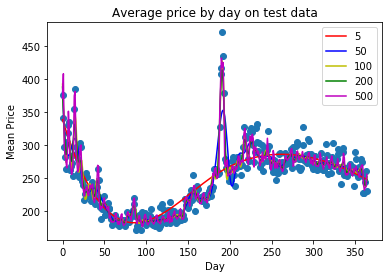

In [7]:
#Create model with different number of splines
x = DailyMeanTraindf.Day
y = DailyMeanTraindf.price
x2 = DailyMeanTestdf.Day
y2 = DailyMeanTestdf.price
plt.scatter( x2, y2)  
plt.title("Average price by day on test data")
plt.xlabel("Day")
plt.ylabel("Mean Price")
def model_gam(nspline, color):
  #Fit n splines
  lam = np.logspace(-3,5,5)
  lams=lam*3
  print(lams)
  gam = LinearGAM(s(0, n_splines=nspline) ).fit(x, y)
  gam.gridsearch(x,y,lam=lams)
  gam.summary()
  y_gam_pred = gam.predict( x)
  r2 = r2_score(y,y_gam_pred)
  #check test data 
  y2_gam_pred = gam.predict(x2)
  r2test = r2_score(y2,y2_gam_pred)
  print("R2 for training data with " + str(nspline)+ " splines is "  + str(r2) + " and test data is " +str(r2test))
  plt.plot(x2, gam.predict(x2), color, label = str(nspline))
  return gam

  

gam5 = model_gam(5,"r")
gam50 = model_gam(50,"b")
gam100 = model_gam(100,"y")
gam200 = model_gam(200,"g")
gam200 = model_gam(500,"m")
plt.legend()
plt.show()

### 4. Effects of parameters
_your answer here_<br />
<font color='blue'>
For the different number of splines we can see that the r2 and gcv for both training an testing is best with 500 spline and a lamda of .003. This can also be seen in the cross validation graph.
</font>

### Part 1b: Adapting to weekends

It is possible/likely that prices on weekends (Friday nights and Saturday nights) are systematically higher than prices on weekdays, and that including this aspect of the data-generating process in our model will produce a better fit.

5. Create a binary indicator of weekend versus non-weekend, and include it in your best-performing model from above. How does it impact the model's performance?  
*Hint*: include a categorical variable in a GAM by importing and using `pygam.f` in the same way you've used `pygam.s` for continuous variables.


In [8]:
#your code here


# Add Weekend column

# Add a new column named 'Price' 
caltrain1['Weekend'] = [1 if (x == 4 or x ==5) else 0 for x in caltrain1['Weekday']] 
caltrain3 = caltrain1.loc[:, ['Day', 'Weekend']]
caltrain2 = pd.DataFrame(caltrain3.drop_duplicates(subset=['Day','Weekend']).sort_values(by=['Day']))
x = caltrain2.Weekend
print(type(x))
DailyMeanWePrice = DailyMeanTraindf
DailyMeanWePrice['Weekend'] = x.tolist()
X = DailyMeanWePrice.loc[:, ['Day', 'Weekend']]
y = DailyMeanWePrice.price
gam = LinearGAM(s(0, n_splines=500) + f(1)).fit(X, y)
lam = np.logspace(-3,5,5)
lams=lam*3
gam.gridsearch(X,y,lam=lams)
gam.summary()

#Prepare test data
# Add a new column named 'Price' 
caltest1['Weekend'] = [1 if (x == 4 or x ==5) else 0 for x in caltest1['Weekday']] 
caltest3 = caltest1.loc[:, ['Day', 'Weekend']]
caltest2 = pd.DataFrame(caltest3.drop_duplicates(subset=['Day','Weekend']).sort_values(by=['Day']))
x = caltest2.Weekend
print(type(x))
DailyMeanWePriceTest = DailyMeanTestdf
DailyMeanWePriceTest['Weekend'] = x.tolist()
X2 = DailyMeanWePriceTest.loc[:, ['Day', 'Weekend']]
y2 = DailyMeanWePriceTest.price

  
y_gam_pred = gam.predict( X)
r2 = r2_score(y,y_gam_pred)
y2_gam_pred = gam.predict(X2)
r2test = r2_score(y2,y2_gam_pred)
print("R2 for training data including weekend information " + str(500)+ " splines is "  + str(r2)  + " and test data is " + str(r2test))


/Applications/anaconda3/envs/cs109b/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<class 'pandas.core.series.Series'>


100% (5 of 5) |##########################| Elapsed Time: 0:00:11 Time:  0:00:11
/Applications/anaconda3/envs/cs109b/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

/Applications/anaconda3/envs/cs109b/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    352.5521
Link Function:                     IdentityLink Log Likelihood:                                  -777.4001
Number of Samples:                          365 AIC:                                             2261.9043
                                                AICc:                                           26257.5788
                                                GCV:                                                0.9178
                                                Scale:                                              3.3395
                                                Pseudo R-Squared:                                   0.9999
Feature Function                  Lam

_your answer here_<br />
<font color='blue'>
Using the best lambda from the above GAM model the test R-Squared stayed relatively the same at 0.927.
</font>

### Part 1c: Going the Distance

You may have noticed from your scatterplots of average price versus day on the training set that there are a few days with abnormally high average prices.

Sort the training data in decreasing order of average price, extracting the 10 most expensive dates. Why are the prices on these days so high? Is it something about the days themselves, noise, an artifact of data collection, or something else?

In [9]:
#your code here
Datemean = caltrain1.groupby('date')['price'].mean()
Datemeandf = pd.DataFrame({'Day':Datemean.index, 'price':Datemean.values})
Datemeandf.sort_values(by=['price'], ascending=False)[:10]
#print("a")

,Day,price
190,2018-04-14,432.680761
192,2018-04-16,425.289528
191,2018-04-15,417.170404
1,2017-10-07,409.298701
189,2018-04-13,393.609047
15,2017-10-21,381.526515
14,2017-10-20,374.955932
0,2017-10-06,370.173410
193,2018-04-17,369.371060
7,2017-10-13,351.800725


_your answer here_<br />
<font color='blue'>
I looked at the top 10 of average price by day and it appear that there is an expensive week in April, probably due to the Boston marathon, and several days in october, possibly due to the Head of the Charles Regatta, that are expensive. In addition, October 6th and 7th are the Saturday and Sunday preceding Columbus day.
</font>

### Problem 2: Predicting Airbnb Rental Price Through Listing Features

In this problem, we'll continue our exploration of Airbnb data by predicting price based on listing features. The data can be found in `listings_train.csv` and `listings_test.csv`.

First, visualize the relationship between each of the predictors and the response variable. Does it appear that some of the predictors have a nonlinear relationship with the response variable?

In [10]:
#your code here
list_train = pd.read_csv("../data/listings_train.csv");
list_train = pd.get_dummies(list_train, prefix=['room_type']);
list_train.rename(columns={'room_type_Entire home/apt': 'entire_home',
                           'room_type_Private room': 'private_room',
                           'room_type_Shared room': 'shared_room'}, inplace=True);

list_test = pd.read_csv("../data/listings_test.csv");
list_test = pd.get_dummies(list_test, prefix=['room_type']);
list_test.rename(columns={'room_type_Entire home/apt': 'entire_home',
                          'room_type_Private room': 'private_room',
                          'room_type_Shared room': 'shared_room'}, inplace=True);

list_train.info()
list_train.head()
list_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 14 columns):
host_total_listings_count    4370 non-null int64
latitude                     4370 non-null float64
longitude                    4370 non-null float64
bathrooms                    4370 non-null float64
bedrooms                     4370 non-null int64
beds                         4370 non-null int64
price                        4370 non-null int64
security_deposit             4370 non-null int64
cleaning_fee                 4370 non-null int64
availability_365             4370 non-null int64
number_of_reviews            4370 non-null int64
entire_home                  4370 non-null uint8
private_room                 4370 non-null uint8
shared_room                  4370 non-null uint8
dtypes: float64(3), int64(8), uint8(3)
memory usage: 388.5 KB


,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,availability_365,number_of_reviews,entire_home,private_room,shared_room
count,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.00000
mean,80.321053,42.339982,-71.083952,1.244394,1.340732,1.754005,172.271396,12.036613,43.638902,157.512357,24.842563,0.629062,0.359268,0.01167
std,222.020576,0.025242,0.032747,0.506987,0.871151,1.244862,114.965528,16.598625,38.728528,138.638960,43.774003,0.483111,0.479841,0.10741
min,1.000000,42.235760,-71.179257,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,42.328950,-71.105020,1.000000,1.000000,1.000000,66.000000,1.000000,3.000000,10.000000,1.000000,0.000000,0.000000,0.00000
50%,2.000000,42.345417,-71.077116,1.000000,1.000000,1.000000,147.000000,2.000000,36.000000,128.000000,7.000000,1.000000,0.000000,0.00000
75%,11.000000,42.356017,-71.061138,1.000000,2.000000,2.000000,287.750000,24.000000,81.000000,316.000000,28.000000,1.000000,1.000000,0.00000
max,982.000000,42.396191,-70.988496,6.000000,10.000000,16.000000,363.000000,61.000000,117.000000,365.000000,401.000000,1.000000,1.000000,1.00000


In [11]:
list_train.head()

,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,availability_365,number_of_reviews,entire_home,private_room,shared_room
0,1,42.347956,-71.155196,1.0,1,1,52,1,65,365,26,0,1,0
1,85,42.349299,-71.083470,1.0,0,1,110,1,104,107,38,1,0,0
2,6,42.341902,-71.073792,1.0,1,1,67,45,56,322,9,1,0,0
3,1,42.319235,-71.105016,2.0,2,2,103,8,113,341,49,1,0,0
4,1,42.346452,-71.134896,1.0,0,1,8,24,82,41,13,1,0,0


In [12]:
from pandas.plotting import scatter_matrix

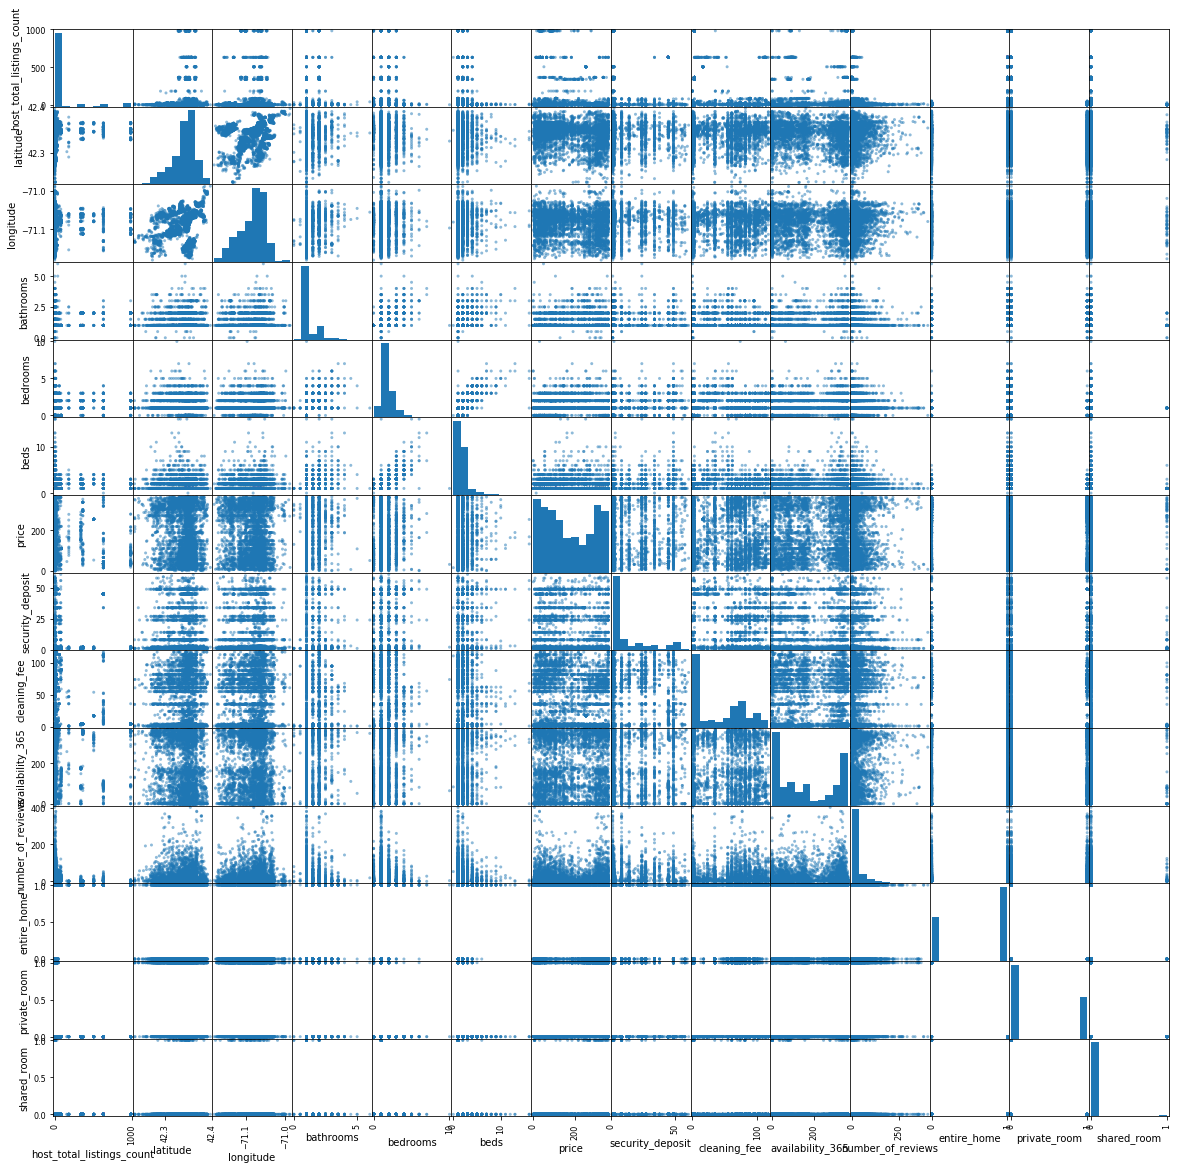

In [13]:
scatter_matrix(list_train, figsize=(20, 20));

_your answer here_<br />
<font color='blue'>
Looking at the scatterplot matrix, at the vertical column of price, we see that price may have a nonlinear relationship with several predictors, such as latitude, longitude, availability_363 (looks like there are four quadrants of prices), and number of review.
</font>

### Part 2a: Polynomial Regression

Fit the following models on the training set and compare the $R^2$ score of the fitted models on the test set:
    
* Linear regression
* Regression with polynomial basis functions of degree 3 (i.e., basis functions $x$, $x^2$, $x^3$ for each predictor $x$) for quantitative predictors.

In [14]:
#your code here
formula = "price ~ " + " + ".join(list_train.columns.difference(['price', 'entire_home', 'private_room', 'shared_room'])) + " + " + " np.power(" + ",2) + np.power(".join(list_train.columns.difference(['price', 'entire_home', 'private_room', 'shared_room'])) + ",2) + " + " np.power(" + ",3) + np.power(".join(list_train.columns.difference(['price', 'entire_home', 'private_room', 'shared_room'])) + ",3) + " + " + ".join(list_train[['private_room', 'shared_room']].columns)
print(formula)

In [15]:
fit_lm_p = sm.ols(formula=formula, data=list_train).fit();
#fit_lm_p.summary()
print('R Squared from full model of degree 3       :', fit_lm_p.rsquared);
print('R Squared from full model of degree 3 (test):', r2_score(list_test['price'], fit_lm_p.predict(list_test)));

price ~ availability_365 + bathrooms + bedrooms + beds + cleaning_fee + host_total_listings_count + latitude + longitude + number_of_reviews + security_deposit +  np.power(availability_365,2) + np.power(bathrooms,2) + np.power(bedrooms,2) + np.power(beds,2) + np.power(cleaning_fee,2) + np.power(host_total_listings_count,2) + np.power(latitude,2) + np.power(longitude,2) + np.power(number_of_reviews,2) + np.power(security_deposit,2) +  np.power(availability_365,3) + np.power(bathrooms,3) + np.power(bedrooms,3) + np.power(beds,3) + np.power(cleaning_fee,3) + np.power(host_total_listings_count,3) + np.power(latitude,3) + np.power(longitude,3) + np.power(number_of_reviews,3) + np.power(security_deposit,3) + private_room + shared_room
R Squared from full model of degree 3       : 0.2706476943830559
R Squared from full model of degree 3 (test): 0.23783233006036397


### Part 2b: Generalized Additive Model (GAM)

1. Do you see any advantage in fitting an additive regression model to these data, compared to the above models?

1. Fit a GAM to the training set, and compare the test $R^2$ of the fitted model to the above models. You may use a smoothing spline basis function on each predictor, with the same smoothing parameter for each basis function, tuned using cross-validation on the training set.

2. Plot and examine the smooth of each predictor for the fitted GAM. What are some useful insights conveyed by these plots?


_your answer here_<br />
<font color='blue'>
Yes, I do see an advantage in fitting an additive regression model to these data because of the nonlinear relationship that may be beyond what a 3 degree polynomial model can properly fit. 
</font>

In [16]:
from pygam import LinearGAM, s, f
from sklearn.preprocessing import LabelEncoder

#your code here
np.random.seed(109)
lams = np.exp(np.random.rand(100) * 8 - 3)

list_train.columns

Index(['host_total_listings_count', 'latitude', 'longitude', 'bathrooms',
       'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee',
       'availability_365', 'number_of_reviews', 'entire_home', 'private_room',
       'shared_room'],
      dtype='object')

In [17]:
X = list_train[['entire_home', 'private_room', 'shared_room', 'host_total_listings_count',
                'latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'security_deposit',
                'cleaning_fee', 'availability_365', 'number_of_reviews']]
y = list_train['price']

In [18]:
# f(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10)
gam_par2 = LinearGAM().fit(X, y)
gam_par2.gridsearch(X, y, lam=lams)
gam_par2.summary()

100% (100 of 100) |######################| Elapsed Time: 0:03:31 Time:  0:03:31


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     48.8208
Link Function:                     IdentityLink Log Likelihood:                                -44115.0451
Number of Samples:                         4370 AIC:                                            88329.7319
                                                AICc:                                           88330.9043
                                                GCV:                                             9860.3821
                                                Scale:                                           9662.2961
                                                Pseudo R-Squared:                                    0.277
Feature Function                  Lam

/Applications/anaconda3/envs/cs109b/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  after removing the cwd from sys.path.


In [19]:
Xt = list_test[['entire_home', 'private_room', 'shared_room', 'host_total_listings_count',
                'latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'security_deposit',
                'cleaning_fee', 'availability_365', 'number_of_reviews']]
yt = list_test['price']

In [20]:
print('R Squared from GAM model on Listing Data       :', r2_score(y, gam_par2.predict(X)));
print('R Squared from GAM model on Listing Data (test):', r2_score(yt, gam_par2.predict(Xt)));

R Squared from GAM model on Listing Data       : 0.2769550515640933
R Squared from GAM model on Listing Data (test): 0.24006784540317605


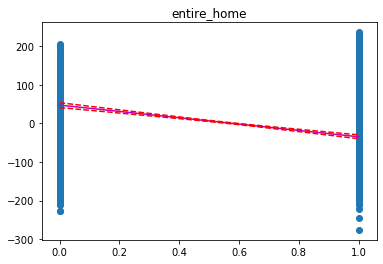

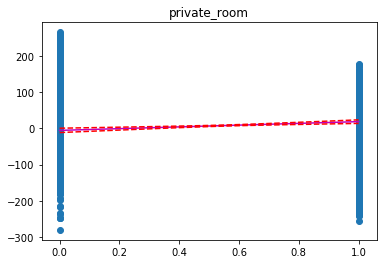

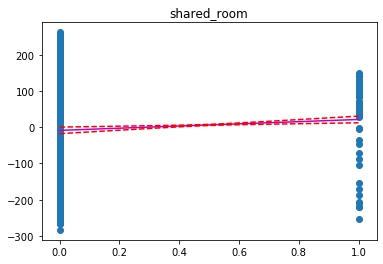

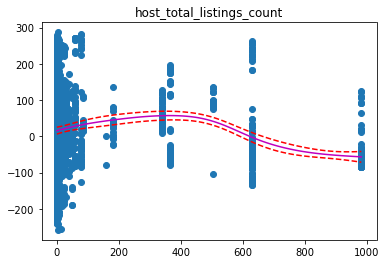

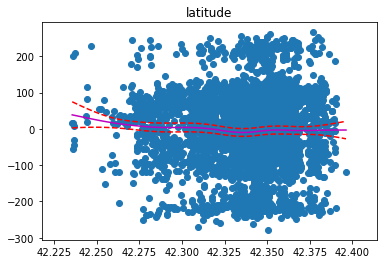

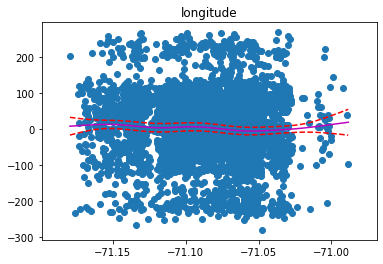

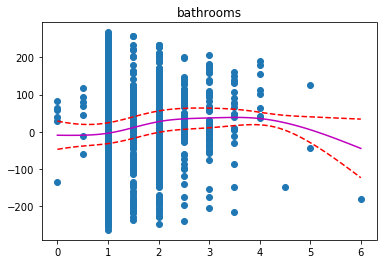

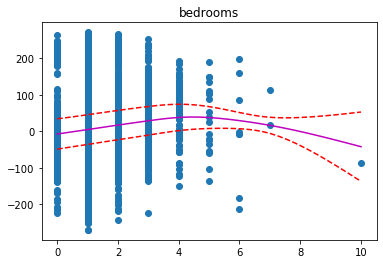

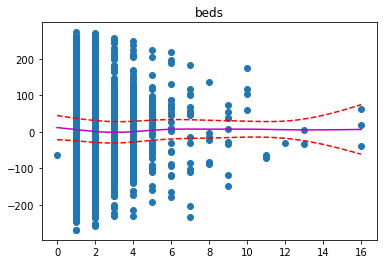

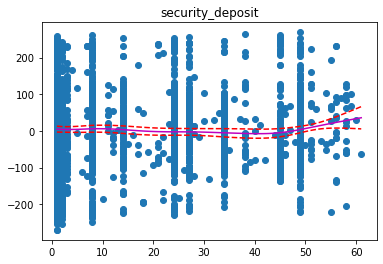

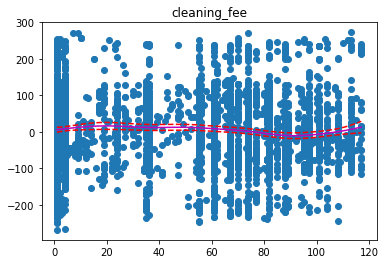

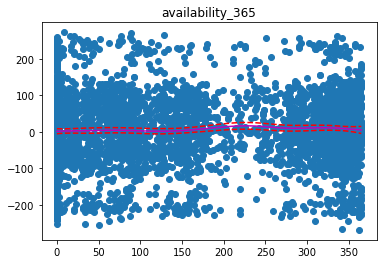

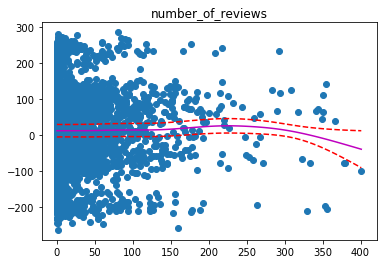

In [21]:
#your code here
res = gam_par2.deviance_residuals(X, y)
for i, term in enumerate(gam_par2.terms):
    if term.isintercept:
        continue

    XX = gam_par2.generate_X_grid(term=i)
    pdep, confi = gam_par2.partial_dependence(term=i, X=XX, width=0.95)
    pdep2, _ = gam_par2.partial_dependence(term=i, X=X, width=0.95)
    plt.figure()
    plt.scatter(X.iloc[:,term.feature], pdep2 + res)
    plt.plot(XX[:, term.feature], pdep, c='m')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(X.columns.values[term.feature])
    plt.show()

### Part 2c: Putting it All Together
Using the GAM outputs and insights from part 1), discuss the most important variables in the driving prices, and give advide to a frugal traveller hoping to visit Boston.

_your answer here_<br />
<font color='blue'>
1. Firstly, the GAM model's train and test R-Squared is very similar, slighty higher, to that of the linear model with a 3 degree polynomial, so GAM did not improve the model by much.
2. Secondly, considering the featurs in the model both models don't explain much of the variabtion in the daily prices and we may need other features, such as local events, holidays or holiday (long) weekends, and/or quality of room, to improve the prediction.
3. From the GAM summary the following features are significant:
    - entire_home `s(0)***`: an entire home is less expensive, all else equal.<br />
    - private_room `s(1)***`: a private room is slightly more expensive, all else equal.<br />
    - shared_room `s(2)**`: a shared room is more expensive, all else equal.<br />
    - host_total_listings_count `s(3)***`: having a large amount of listings (beyond 500) is less expensive, all else equal.<br />
    - latitude `s(4)*`: a very low latitude is more expensive, all else equal.<br />
    - bathrooms `s(6)***`: increasing the number of bathrooms is more expensive, all else equal.<br />
    - bedrooms `s(7)*`: increasing the number of bedrooms is more expensive, all else equal.<br />
    - security_deposit `s(9)***`: a very large security depost is more expensive, all else equal.<br />
    - cleaning_fee `s(10)***`: a very high cleaning fee, between 80 and 100, is less expensive, all else equal.<br />
    - In addition, we saw in the weekend model that the weekend is had a significant impact on prices. Since we did not produce A partial dependence plot I can only assume that weekend prices are higher.<br />

The recommendation to the frugal traveler is to travel on weekdays using an entire house with few bathrooms and bedrooms with many listings by the host, which are the most pronounced and significant variables from the plots.
</font>